In [ ]:
##Importing Libraries##

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve
import pickle
import joblib

In [3]:
print(ENGLISH_STOP_WORDS)

frozenset({'de', 'not', 'never', 'of', 'then', 'some', 'whereupon', 'noone', 'as', 'the', 'four', 'themselves', 'cry', 'has', 'who', 'without', 'yours', 'still', 'me', 'whoever', 'thus', 'sometimes', 'show', 'most', 'take', 'hasnt', 'amongst', 'whole', 'con', 'yourselves', 'else', 'nevertheless', 'anything', 'ourselves', 'done', 'otherwise', 'ltd', 'off', 'neither', 'alone', 'perhaps', 'wherever', 'whither', 'can', 'sincere', 'empty', 'you', 'same', 'top', 'himself', 'should', 'both', 'in', 'those', 'everything', 'inc', 'when', 'hundred', 'someone', 'six', 'therein', 'ten', 'whence', 'several', 'for', 'amoungst', 'am', 'fifteen', 'because', 'former', 'whenever', 'except', 'across', 'last', 'such', 'after', 'was', 'everyone', 'ours', 'beside', 'next', 'it', 'hereafter', 'meanwhile', 'there', 'what', 'few', 'front', 'upon', 'his', 'however', 'move', 'seeming', 'thereafter', 'whether', 'may', 'sixty', 'always', 'hers', 'somewhere', 'see', 'thick', 'might', 'latterly', 'even', 'eleven', 'u

In [ ]:
## Data Preparation##

In [4]:
train=pd.read_csv('./fake-news/train.csv')
test=pd.read_csv('./fake-news/test.csv')
print(f"train shape : {train.shape}")
print(f"test shape : {test.shape}")
train.head()
test.head()

train shape : (20800, 5)
test shape : (5200, 4)


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [6]:
train.isna().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
test.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [ ]:
##Data Preprocessing##

In [8]:
train.fillna(" ", inplace= True)
test.fillna(" ", inplace= True)

In [9]:
train['content'] = train['title'] + " " + train['author']
test['content'] = test['title'] + " " + test['author']


In [10]:
train.head()


,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [11]:
test.head()

,id,title,author,text,content
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [12]:
##Stemming##

In [13]:
port_stem = PorterStemmer()

In [14]:
def stemming(content):
    #replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    #Convert all words into lower case letters
    stemmed_content = stemmed_content.lower() 
    # Split the words into list
    stemmed_content = stemmed_content.split()
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in ENGLISH_STOP_WORDS]
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [15]:
train['content']= train['content'].apply(stemming)
test['content']= test['content'].apply(stemming)


In [16]:
train['content']


0        hous dem aid didn t comey s letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                             truth fire consortiumnew com
3        civilian kill singl airstrik identifi jessica ...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper t trump poster child white supremaci je...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci s said receiv takeov approach hudson s ba...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object

In [17]:
test['content']

0       specter trump loosen tongu purs string silicon...
1       russian warship readi strike terrorist near al...
2       nodapl nativ american leader vow stay winter f...
3       tim tebow attempt comeback time basebal new yo...
4        keiser report meme war e truth broadcast network
                              ...                        
5195    bangladeshi traffic jam end new york time jodi...
5196    john kasich sign abort ohio veto restrict meas...
5197    california today exactli sushi new york time m...
5198                   marin deploy russian border norway
5199        awkward sex onscreen new york time teddi wayn
Name: content, Length: 5200, dtype: object

In [18]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts_train = count_vectorizer.fit_transform(train['content'].values)
counts_test = count_vectorizer.fit_transform(train['content'].values)
tfi_train = transformer.fit_transform(counts_train)


In [19]:
targets = train['label'].values


In [20]:
print(f"target shape: {targets.shape}")
print(f"X shape: {tfi_train.shape}")

target shape: (20800,)
X shape: (20800, 127235)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(tfi_train, targets, test_size=0.2, random_state=49)

In [22]:
print(f"The shape of X_train is: {X_train.shape[0]}")
print(f"The shape of X_test is: {X_test.shape[0]}")

The shape of X_train is: 16640
The shape of X_test is: 4160


In [23]:
##Iterate##

In [24]:
def train(model , model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,y_test)}")
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(X_test)
    ))

In [25]:
##Regression##

In [30]:
model_lr = LogisticRegression()

In [32]:
train(model_lr, 'LogisticRegression')

Training accuracy of LogisticRegression is 0.9884615384615385
testing accuracy of LogisticRegression is 0.9723557692307693


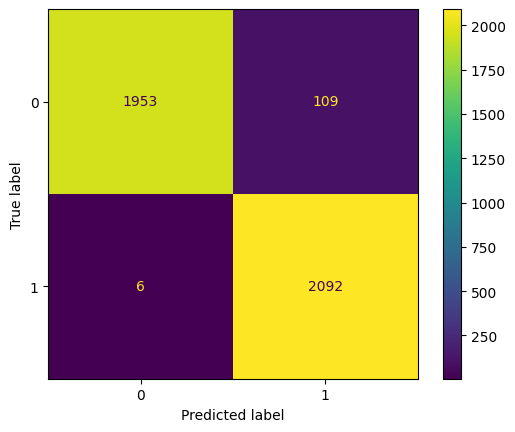

In [33]:
conf_matrix(model_lr)

In [34]:
class_report(model_lr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2062
           1       0.95      1.00      0.97      2098

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [43]:
with open('fake_news_model.pkl', 'wb') as f:
    pickle.dump(model_lr, f)

In [47]:
model = joblib.load('fake_news_model.pkl')

In [48]:
new_texts = ['title','author','Breaking News: UFO spotted over Statue of Liberty',
             'Study finds chocolate is good for your health',
             'CDC announces new guidelines for vaccinated individuals']
prediction = model.predict(new_texts)
print(prediction)

ValueError: Expected 2D array, got 1D array instead:
array=['title' 'author' 'Breaking News: UFO spotted over Statue of Liberty'
 'Study finds chocolate is good for your health'
 'CDC announces new guidelines for vaccinated individuals'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.